<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #4**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. Titanic dataset에 대하여 데이터 탐색, 시각화 및 전처리

Titanic dataset에 대해 데이터 탐색 및 시각화, 전처리를 하기 위해서 캐글에서 Titanic dataset을 다운받는다. 우리는 모든 feature를 쓰지 않을 것이기 때문에 train set을 전처리한 후에 해당 데이터만을 가지고 train set과 validation set으로 나누어 로지스틱 회귀 모형의 성능을 평가할 것이다. 데이터를 받고 데이터의 모양과 feature 정보를 조회하면 다음과 같다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5) 


In [ ]:
#캐글사이트(https://www.kaggle.com/c/titanic/data)에서 데이터 파일을 다운로드 받은 경로에 맞게 설정하여 데이터 로드.
df_train = pd.read_csv('/home/kwnam/다운로드/titanic/train.csv')
df_test = pd.read_csv('/home/kwnam/다운로드/titanic/test.csv')

In [ ]:
#학습데이터, 테스트데이터의 차원 조회 (테스트데이터에는 'survived' 칼럼이 없음)
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [ ]:
columns=df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

우리는 ‘Survived’의 클래스를 Target value(y)로 사용할 것이니 이를 지정해준 다음 Survived열을 시각화 한다.

In [ ]:
df_train['Survived'].value_counts() #target value로 사용할 컬럼인 'Survived'의 클래스 별 데이터 수

0    549
1    342
Name: Survived, dtype: int64

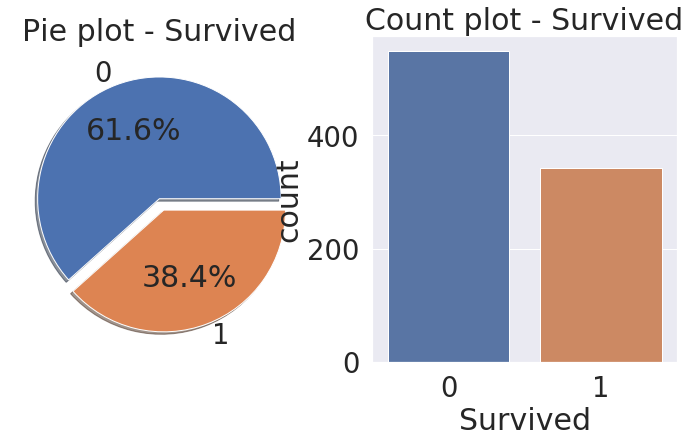

In [ ]:
#'Survived' 컬럼 시각화
f, ax = plt.subplots(1, 2, figsize =(12, 6))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot("Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

그 다음 학습에 불필요한 컬럼을 제거하고 결측치 및 null 값을 제거해준다. 그 후 문자열로 이루어진 성별 컬럼은 숫자로 바꿔주고 더 좋은 학습을 위하여 데이터 중 이상치를 제거해준다.

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#이번 실습에서 학습에 사용하지 않을 컬럼 제거
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)

#결측치를 평균값으로 대체
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [ ]:
#문자열로 이루어진 'sex' 컬럼은 숫자로 매핑
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

#'Age', 'Fare' 컬럼에 대하여 평균으로부터 3시그마 안에 포함되지 않는 값들은 이상치로 판단하여 모두 제거
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)

### 2. 로지스틱 회귀모형 학습 후 Cut off 조절하여 모델의 성능 평가

우리는 아까 Train data에서 tran set과 validation set으로 나눠서 학습 및 검증을 수행하기로 하였다. 따라서 기존의 train set을 train set과 validation set으로 나눈 후 로지스틱 회귀 모형을 학습해보자.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
df_train = pd.read_csv('/home/kwnam/다운로드/titanic/train.csv')
df_test = pd.read_csv('/home/kwnam/다운로드/titanic/test.csv')
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'],axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames , inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*fare_std].index
train.drop(indexNames , inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*fare_std].index
train.drop(indexNames , inplace=True)
#'4장_Titanic dataset 탐색 및 전처리.ipynb'에서 전처리 코드만 실행하는 부분

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [ ]:
X_train.shape, X_test.shape

((864, 6), (418, 7))

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2020)
y_tr.shape, y_vld.shape

((691,), (173,))

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [ ]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

Survivied 열을 target value로 지정하고 기존의 train set을 앞서 말했던 것처럼 train set과 validation set으로 나눠준 후 로지스틱 회귀 모형을 학습시켰다.

그 다음 학습에 사용된 인원 수와 생존 여부를 예측하구 그 예측의 정확도와 confusion matrix를 위와 같이 구한다. 또한 precision, recall, f1-score 또한 동시에 구해주도록 하자.

In [ ]:
print('Number of people: {} \naccuracy: {:.2f}% '.format(y_vld.shape[0], 100 * accuracy_score(y_vld,prediction)))

Number of people: 173 
accuracy: 78.03% 


In [ ]:
confusion_matrix(y_vld,prediction)

array([[94, 24],
       [14, 41]])

In [ ]:
print('Precision: {:.2f}% \nRecall: {:.2f}% \nF1-score: {:.2f}% '.format(100*precision_score(y_vld,prediction),
                                                                         100*recall_score(y_vld,prediction),100*f1_score(y_vld,prediction)))

Precision: 63.08% 
Recall: 74.55% 
F1-score: 68.33% 


In [ ]:
#cut off 조절에 따른 모델의 성능을 평가해 보기 위하여 cut off 값 생성 및 각각의 성능 지표 도출
#cut off 값은 다양하게 선택 가능.
list = []
for i in np.linspace(0,1,100):
    pred = model.predict_proba(X_vld)[:,1] > i
    cf_mtx = confusion_matrix(y_vld, pred)
    acc = accuracy_score(y_vld, pred)
    tpr = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_vld, pred)
    list.append([i, acc, f1, tpr, fpr])

cut_off = DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "TPR", "FPR"]
cut_off

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.317919,0.482456,0.000000,0.000000
1,0.010101,0.323699,0.484581,0.008475,0.000000
2,0.020202,0.323699,0.484581,0.008475,0.000000
3,0.030303,0.329480,0.486726,0.016949,0.000000
4,0.040404,0.329480,0.486726,0.016949,0.000000
...,...,...,...,...,...
95,0.959596,0.687861,0.100000,0.983051,0.945455
96,0.969697,0.687861,0.100000,0.983051,0.945455
97,0.979798,0.676301,0.034483,0.983051,0.981818
98,0.989899,0.676301,0.000000,0.991525,1.000000


그 후 0과 1 사이를 100등분하여 cut off 값을 다양하게 cast하면서 각각의 cut off 값에 대한 Accuracy, f1 score, recall, precision score를 도출한다. output을 보면 cutoff 값이 변할 때마다 accuracy 값과 f1 score, recall score, precision score가 다양하게 변하는 것을 확인할 수 있다.

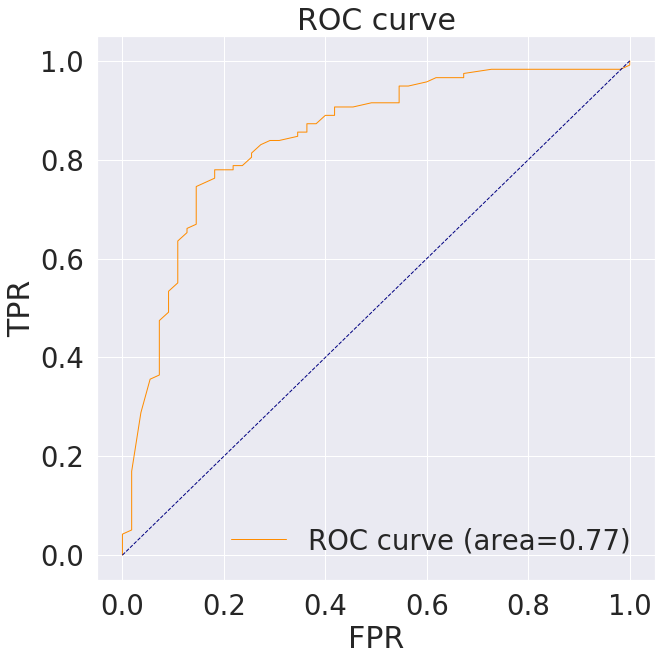

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_vld, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

ROC 커브를 그려보면 위와 같다. 이번 실습에서는 Cut off 값을 accuracy가 최대인 경우와 f1-score가 최대인 경우로 조절해보았다.

In [ ]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()] #accuracy가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
70,0.707071,0.803468,0.653061,0.90678,0.418182


In [ ]:
cut_off_ACC_MAX = cut_off[cut_off["ACC"] == cut_off["ACC"].max()]["CUTOFF"][70]
cut_off_ACC_MAX

0.7070707070707072

In [ ]:
pred_ACC_MAX = model.predict_proba(X_vld)[:,1] > cut_off_ACC_MAX

In [ ]:
confusion_matrix(y_vld,pred_ACC_MAX)

array([[107,  11],
       [ 23,  32]])

In [ ]:
cut_off[cut_off["F1"] == cut_off["F1"].max()] #F1-score가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
45,0.454545,0.791908,0.714286,0.779661,0.181818


In [ ]:
cut_off_F1_MAX = cut_off[cut_off["F1"] == cut_off["F1"].max()]["CUTOFF"][45]
cut_off_F1_MAX

0.4545454545454546

In [ ]:
pred_F1_MAX = model.predict_proba(X_vld)[:,1] > cut_off_F1_MAX

In [ ]:
confusion_matrix(y_vld,pred_F1_MAX)

array([[92, 26],
       [10, 45]])

이를 통해 보면 accuracy가 최대가 되는 값은 cutoff가 대략 0.707071 정도이며 이 때의 confusion matrix는 output와 같다는 것을 확인할 수 있다. 또한 cutoff 0.454545에서 f1-socre가 최대가 되는데 이때의 confusion matrix는 마지막 output과 같음을 볼 수 있다.